In [1]:
# Membuat proyek awal menggunakan PySpark dan Pandas
from pyspark.sql import SparkSession

# Menginisialisasi sesi Spark
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Menyusun DataFrame sederhana dengan data contoh
data = [("Ali", 34), ("Budi", 23), ("Citra", 29), ("Dina", 45)]
columns = ["Nama", "Usia"]
df = spark.createDataFrame(data, columns)

# Menampilkan isi DataFrame ke layar
df.show()

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/09/01 23:29:16 WARN Utils: Your hostname, zurich-VivoBook-ASUSLaptop-X412FL-A412FL, resolves to a loopback address: 127.0.1.1; using 10.113.113.182 instead (on interface wlo1)
25/09/01 23:29:16 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/09/01 23:29:18 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
                                                                                

+-----+----+
| Nama|Usia|
+-----+----+
|  Ali|  34|
| Budi|  23|
|Citra|  29|
| Dina|  45|
+-----+----+



In [2]:
# Tugas 1: Jalankan program berikut lalu lakukan modifikasi 
# dengan menambahkan atribut baru seperti pekerjaan, hobi, dan gender

from pyspark.sql import SparkSession

# Mengaktifkan sesi Spark
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Menyusun DataFrame dengan tambahan kolom pekerjaan, hobi, serta gender
data = [("Ali", 34, "TNI", "Memancing", "L"),
        ("Budi", 23, "TNI", "Olahraga", "L"),
        ("Citra", 29, "Guru", "Senam", "P"),
        ("Dina", 45, "Karyawan", "Senam", "P")]
columns = ["Nama", "Usia", "Pekerjaan", "Hobi", "Gender"]
df = spark.createDataFrame(data, columns)

# Menampilkan hasil DataFrame ke output
df.show()

+-----+----+---------+---------+------+
| Nama|Usia|Pekerjaan|     Hobi|Gender|
+-----+----+---------+---------+------+
|  Ali|  34|      TNI|Memancing|     L|
| Budi|  23|      TNI| Olahraga|     L|
|Citra|  29|     Guru|    Senam|     P|
| Dina|  45| Karyawan|    Senam|     P|
+-----+----+---------+---------+------+



In [3]:
# Praktik PySpark Tingkat Lanjut
# Latihan 1: Manipulasi Data dengan PySpark
# Tugas 2: Terapkan filter, hitung nilai rata-rata, dan urutkan data menggunakan PySpark

from pyspark.sql import SparkSession

# Membuka sesi kerja Spark
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame dengan beberapa kolom tambahan
data = [("Ali", 34, "TNI", "Memancing", "L"),
        ("Budi", 23, "TNI", "Olahraga", "L"),
        ("Citra", 29, "Guru", "Senam", "P"),
        ("Dina", 45, "Karyawan", "Senam", "P")]
columns = ["Nama", "Usia", "Pekerjaan", "Hobi", "Gender"]
df = spark.createDataFrame(data, columns)

# Menampilkan isi DataFrame awal
df.show()

# Menyaring data (filter) untuk menampilkan usia di atas 30 tahun
df_filtered = df.filter(df['Usia'] > 30)
df_filtered.show()

# Menghitung rata-rata kolom usia
from pyspark.sql.functions import avg
df.groupBy().agg(avg("Usia")).show()

# Mengurutkan data berdasarkan usia dari yang tertinggi ke terendah
df_sorted = df.orderBy("Usia", ascending=False)

+-----+----+---------+---------+------+
| Nama|Usia|Pekerjaan|     Hobi|Gender|
+-----+----+---------+---------+------+
|  Ali|  34|      TNI|Memancing|     L|
| Budi|  23|      TNI| Olahraga|     L|
|Citra|  29|     Guru|    Senam|     P|
| Dina|  45| Karyawan|    Senam|     P|
+-----+----+---------+---------+------+

+----+----+---------+---------+------+
|Nama|Usia|Pekerjaan|     Hobi|Gender|
+----+----+---------+---------+------+
| Ali|  34|      TNI|Memancing|     L|
|Dina|  45| Karyawan|    Senam|     P|
+----+----+---------+---------+------+



[Stage 8:=============================>                             (2 + 2) / 4]

+---------+
|avg(Usia)|
+---------+
|    32.75|
+---------+



In [4]:
# Praktik menggunakan Pandas
# Latihan 2: Membuat DataFrame dengan library Pandas
import pandas as pd

# Menyusun DataFrame sederhana menggunakan Pandas
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Usia": [34, 23, 29, 45]}
df_pandas = pd.DataFrame(data_pandas)

# Menampilkan isi DataFrame yang dibuat dengan Pandas
df_pandas

,Nama,Usia
0,Ali,34
1,Budi,23
2,Citra,29
3,Dina,45


In [5]:
# Tugas 3: Modifikasi DataFrame Pandas dengan menambahkan kolom baru
# serta melakukan penyaringan data berdasarkan usia
import pandas as pd

# Membuat DataFrame awal menggunakan Pandas
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina"],
               "Usia": [34, 23, 29, 45]}
df_pandas = pd.DataFrame(data_pandas)

# Menambahkan kolom tambahan 'Kategori Usia' dengan kondisi tertentu
df_pandas["Kategori Usia"] = df_pandas["Usia"].apply(lambda x: "Muda" if x < 30 else "Dewasa")

# Menyaring data: hanya menampilkan baris dengan usia lebih dari 30 tahun
df_filtered = df_pandas[df_pandas["Usia"] > 30]

# Menampilkan DataFrame hasil modifikasi
df_pandas
display(df_filtered)

,Nama,Usia,Kategori Usia
0,Ali,34,Dewasa
3,Dina,45,Dewasa


    Nama  Usia Pekerjaan
0    Ali    34    Dokter
1   Budi    23      Guru
2  Citra    29  Insinyur
3   Dina    45   Perawat
            Usia
count   4.000000
mean   32.750000
std     9.322911
min    23.000000
25%    27.500000
50%    31.500000
75%    36.750000
max    45.000000


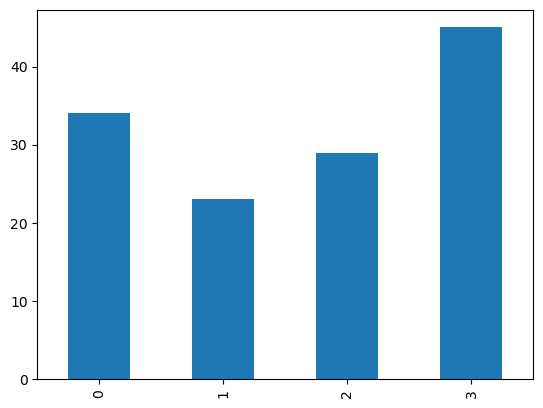

In [7]:
# Praktik Lanjutan dengan Pandas
# Latihan 3: Menerapkan operasi yang lebih kompleks menggunakan Pandas
# Tugas 4: Lakukan penggabungan antar DataFrame serta tampilkan visualisasi data

import pandas as pd

# Membuat DataFrame pertama (berisi nama dan usia)
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Usia": [34, 23, 29, 45]}
df_pandas = pd.DataFrame(data_pandas)

# Membuat DataFrame kedua (berisi nama dan pekerjaan)
data_pandas_2 = {"Nama": ["Ali", "Budi", "Citra", "Dina"],
                 "Pekerjaan": ["Dokter", "Guru", "Insinyur", "Perawat"]}
df_pandas_2 = pd.DataFrame(data_pandas_2)

# Menggabungkan kedua DataFrame berdasarkan kolom 'Nama'
df_joined = pd.merge(df_pandas, df_pandas_2, on="Nama")
print(df_joined)

# Menampilkan statistik deskriptif dari DataFrame pertama
print(df_pandas.describe())

# Membuat visualisasi sederhana berupa diagram batang untuk kolom 'Usia'
import matplotlib.pyplot as plt
df_pandas['Usia'].plot(kind='bar')
plt.show()

In [8]:
# Mengintegrasikan PySpark dengan Pandas
# Latihan 4: Mengonversi DataFrame antara PySpark dan Pandas
# Contoh praktik konversi DataFrame dari PySpark ke Pandas serta dari Pandas ke PySpark

# Konversi DataFrame dari PySpark ke dalam format Pandas
df_pandas_from_spark = df.toPandas()

# Konversi DataFrame dari Pandas menjadi DataFrame PySpark
df_spark_from_pandas = spark.createDataFrame(df_pandas)

# Menampilkan hasil DataFrame yang sudah dikonversi
df_pandas_from_spark, df_spark_from_pandas.show()

+-----+----+
| Nama|Usia|
+-----+----+
|  Ali|  34|
| Budi|  23|
|Citra|  29|
| Dina|  45|
+-----+----+



(    Nama  Usia Pekerjaan       Hobi Gender
 0    Ali    34       TNI  Memancing      L
 1   Budi    23       TNI   Olahraga      L
 2  Citra    29      Guru      Senam      P
 3   Dina    45  Karyawan      Senam      P,
 None)

In [9]:
# Tugas 5: Manfaatkan metode konversi untuk menggabungkan data dari PySpark dengan data Pandas
# Setelah itu lakukan analisis sederhana seperti menghitung rata-rata usia
# Tugas 6: Lanjutkan dengan penggabungan data PySpark dan Pandas
# Kemudian terapkan operasi statistika, misalnya mencari usia maksimum

from pyspark.sql import SparkSession
from pyspark.sql.functions import avg, max
import pandas as pd

# 1. Membuat atau memulai sesi Spark
spark = SparkSession.builder.appName("GabungDataPySparkPandas").getOrCreate()

# 2. Dataset awal yang dibuat dengan PySpark
data_spark = [("Ali", 34), ("Budi", 23), ("Citra", 29), ("Dina", 45)]
columns = ["Nama", "Usia"]
df_spark = spark.createDataFrame(data_spark, columns)

# 3. Dataset tambahan yang dibuat menggunakan Pandas
data_pandas = {
    "Nama": ["Eka", "Fajar"],
    "Usia": [31, 27]
}
df_pandas = pd.DataFrame(data_pandas)

# 4. Ubah DataFrame Pandas menjadi DataFrame PySpark
df_spark_from_pandas = spark.createDataFrame(df_pandas)

# 5. Menggabungkan DataFrame PySpark awal dengan hasil konversi dari Pandas
df_combined = df_spark.union(df_spark_from_pandas)

# 6. Menampilkan DataFrame gabungan
df_combined.show()

# 7. Analisis sederhana: menghitung nilai rata-rata usia
df_combined.groupBy().agg(avg("Usia").alias("Rata-rata Usia")).show()

# 8. Analisis tambahan: menghitung nilai maksimum pada kolom Usia
df_combined.agg(max("Usia").alias("Usia Maksimum")).show()


25/09/01 23:43:26 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


+-----+----+
| Nama|Usia|
+-----+----+
|  Ali|  34|
| Budi|  23|
|Citra|  29|
| Dina|  45|
|  Eka|  31|
|Fajar|  27|
+-----+----+

+--------------+
|Rata-rata Usia|
+--------------+
|          31.5|
+--------------+

+-------------+
|Usia Maksimum|
+-------------+
|           45|
+-------------+

